## Experiments and Model Building 

In [1]:
# In this section, we will continue our experiments utilizing now tree based feature selection method 
# combined with SMOTE and ADASYN resampling techniques.

In [5]:
# Importing the libraries for model building and preprocessing
%matplotlib notebook
import dataframe_image as dfi
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import ADASYN
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [6]:
# Data Prep
data = pd.read_csv('data.csv')
data.columns = data.columns.str.lstrip()
data.rename({'Bankrupt?' : 'Bankruptcy'}, axis = 1, inplace=True)
X = data.drop('Bankruptcy', axis = 1)
y = data['Bankruptcy']

In [7]:
 # Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

# Standardize 
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

#Tree based selection 
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(estimator=RandomForestClassifier())
sel.fit(X_train, y_train)
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

# Resampling 
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train)

from imblearn.over_sampling import ADASYN
oversample = ADASYN()
X_train_ad, y_train_ad = oversample.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>


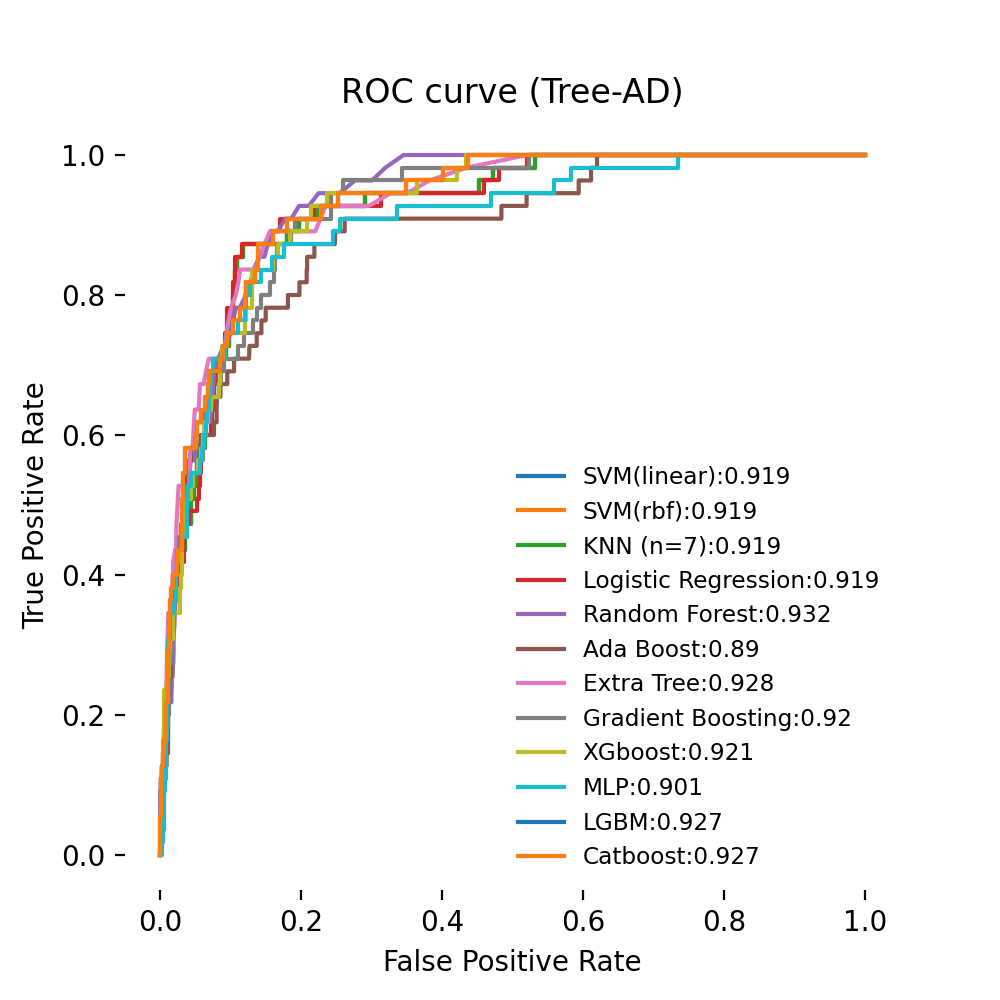

In [8]:
# Combining tree elimination with SMOTE - ROC AUC plot

%matplotlib notebook
plt.figure(figsize=(5,5))

#SVM with linear kernel 
svm_clf = SVC(kernel='linear', probability=True).fit(X_train_ad, y_train_ad)
y_score = svm_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'SVM(linear):' + str(auc))

#SVM with rbf kernel
svmrbf_clf = SVC(kernel='rbf', probability=True).fit(X_train_ad, y_train_ad)
y_score = svm_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'SVM(rbf):' + str(auc))

#KNN algorithm with 7 neighbors
knn_clf = KNeighborsClassifier(n_neighbors=7).fit(X_train_ad, y_train_ad)
y_score = svm_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'KNN (n=7):' + str(auc))

# Logistic regression
lg_clf = LogisticRegression().fit(X_train_ad, y_train_ad)
y_score = lg_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'Logistic Regression:' + str(auc))

# Random forest 
rf_clf = RandomForestClassifier().fit(X_train_ad, y_train_ad)
y_score = rf_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'Random Forest:' + str(auc))

# AdaBoost classifier 
adb_clf = AdaBoostClassifier().fit(X_train_ad, y_train_ad)
y_score = adb_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'Ada Boost:' + str(auc))

# Extra tree clasifier 
xtr_clf = ExtraTreesClassifier().fit(X_train_ad, y_train_ad)
y_score = xtr_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'Extra Tree:' + str(auc))

# Gradient boosting 
gb_clf = GradientBoostingClassifier().fit(X_train_ad, y_train_ad)
y_score = gb_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'Gradient Boosting:' + str(auc))

# XGradient boosting 
xgb_clf = XGBClassifier(eval_metric='logloss', use_label_encoder=False).fit(X_train_ad, y_train_ad)
y_score = xgb_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'XGboost:' + str(auc))

# Multilayer perceptron(MLP)
mlp_clf = MLPClassifier(max_iter=1000).fit(X_train_ad, y_train_ad)
y_score = mlp_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'MLP:' + str(auc))

# LGBM
lgb_clf = LGBMClassifier().fit(X_train_ad, y_train_ad)
y_score = lgb_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'LGBM:' + str(auc))

# Catboost 
cat_clf = CatBoostClassifier(silent=True).fit(X_train_ad, y_train_ad)
y_score = lgb_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'Catboost:' + str(auc))


plt.legend(frameon = False, fontsize='small')
plt.title('ROC curve (Tree-AD)')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('ROC curve (Tree-AD)')
plt.show();

## Tree based + SMOTE 

In [6]:
built_models = [svm_clf ,svmrbf_clf, knn_clf, lg_clf,
                    rf_clf, adb_clf, xtr_clf, gb_clf, 
                     xgb_clf, mlp_clf, lgb_clf, cat_clf]
models_names = ['svm_clf', 'svmrbf_clf', 'knn_clf', 'lg_clf',
                    'rf_clf', 'adb_clf', 'xtr_clf', 'gb_clf',
                     'xgb_clf', 'mlp_clf', 'lgb_clf', 'cat_clf']

scores = ['accuracy', 'recall', 'precision', 'f1 score', 'roc_auc']
df_scores = pd.DataFrame(np.zeros((len(models_names), len(scores))), columns=scores)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1)

In [7]:
for index, model in enumerate(built_models):
    scores = {'acc': 'accuracy',
               'f1_score': 'f1',
                   'recall': 'recall', 
                      'precision' : 'precision', 
                             'roc_auc': 'roc_auc'}
    
    pipe = Pipeline([
    
        ('scaler', MinMaxScaler()),
        ('selection', SMOTE()), 
        ('feature sel', SelectFromModel(RandomForestClassifier())),
        ('classifier', model)
    ])
    
    scores = cross_validate(pipe, X, y, scoring=scores, cv=cv, return_train_score=False)
    val_scores = pd.DataFrame(scores).drop(['fit_time', 'score_time'], axis = 1)
    df_scores.iloc[index, :] = val_scores.mean(axis=0) 
    df_scores.rename({index : models_names[index]}, axis = 0, inplace=True)

/Users/Norayr/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
df_scores.sort_values('recall', ascending=False)    

,accuracy,recall,precision,f1 score,roc_auc
xgb_clf,0.951166,0.432012,0.577273,0.346372,0.927684
cat_clf,0.947206,0.422113,0.595455,0.327538,0.926705
lgb_clf,0.944418,0.415878,0.604545,0.322884,0.925211
xtr_clf,0.939285,0.411991,0.645455,0.305543,0.933023
rf_clf,0.943246,0.411727,0.604545,0.313693,0.925526
gb_clf,0.911131,0.337938,0.704545,0.222572,0.926516
adb_clf,0.899254,0.324447,0.750000,0.207406,0.911056
lg_clf,0.863617,0.289833,0.863636,0.174192,0.928841
knn_clf,0.874615,0.281173,0.759091,0.172784,0.881386
svm_clf,0.854523,0.280526,0.877273,0.167173,0.927643


In [1]:
#dfi.export(df_scores.sort_values('recall', ascending=False), 'Tree-SMOTE.png')

## Tree based + ADASYN

In [10]:
from imblearn.over_sampling import ADASYN
for index, model in enumerate(built_models):
    scores = {'acc': 'accuracy',
               'f1_score': 'f1',
                   'recall': 'recall', 
                      'precision' : 'precision', 
                             'roc_auc': 'roc_auc'}
    
    pipe = Pipeline([
    
        ('scaler', MinMaxScaler()),
        ('selection', ADASYN()), 
        ('feature sel', SelectFromModel(RandomForestClassifier())),
        ('classifier', model)
    ])
    
    scores = cross_validate(pipe, X, y, scoring=scores, cv=cv, return_train_score=False)
    val_scores = pd.DataFrame(scores).drop(['fit_time', 'score_time'], axis = 1)
    df_scores.iloc[index, :] = val_scores.mean(axis=0) 
    df_scores.rename({index : models_names[index]}, axis = 0, inplace=True)

/Users/Norayr/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
df_scores.sort_values('recall', ascending=False)    

,accuracy,recall,precision,f1 score,roc_auc
xgb_clf,0.951167,0.431915,0.568182,0.351325,0.923560
xtr_clf,0.942660,0.423194,0.650000,0.316381,0.936278
lgb_clf,0.948232,0.419088,0.586364,0.329135,0.923302
cat_clf,0.946181,0.408555,0.577273,0.318284,0.922786
rf_clf,0.942663,0.401038,0.586364,0.306114,0.929475
gb_clf,0.912745,0.354893,0.745455,0.233329,0.933263
adb_clf,0.897203,0.325264,0.763636,0.207665,0.921049
mlp_clf,0.868312,0.284741,0.795455,0.174894,0.912044
lg_clf,0.860831,0.281588,0.845455,0.169029,0.928489
knn_clf,0.874176,0.280785,0.754545,0.172785,0.861743


In [2]:
#dfi.export(df_scores.sort_values('recall', ascending=False), 'Tree-ADAYSN.png')